<a href="https://colab.research.google.com/github/Amankhalsa/Data_Science/blob/master/deeplearning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required lib 
    * import pandas
    * import skleran 
    * import pickle
    * import tensorflow 
    * import keras

Accuracy of Model is :84.36


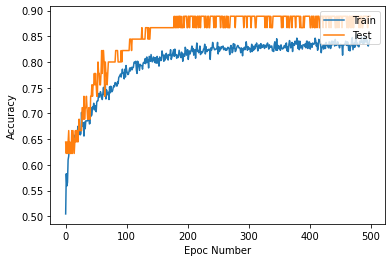

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier
 
df_train = pd.read_csv('train.csv')
 
 
def title(name):
   if '.' in name:
      return name.split(',')[1].split('.')[0].strip()
   else:
      return 'No title Exists'
 
def compact_titles(x):
   title_new = x['Title']
   if title_new in ['Capt', 'Col', 'Major']:
      return 'Officer'
   elif title_new in ['Mr','Master','Don','the Countess','Sir', 'Ms','Jonkheer', 'Dona', 'Lady']:
      return 'Royale People'
   elif title_new in ['Mrs','Master','Miss''the Countess','Mme','Lady']:
      return 'Mrs'
   elif title_new in ['Miss','Mrs','Mlle', 'Ms']:
      return 'Miss'
   else:
      return title_new
 
df_train['Title'] = df_train['Name'].map(lambda x: title(x))
df_train['Title'] = df_train.apply(compact_titles, axis=1)
 
df_train['Age'].fillna(df_train['Age'].median(), inplace =True)
df_train['Fare'].fillna(df_train['Fare'].median(), inplace =True)
df_train['Embarked'].fillna("S" , inplace =True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)
df_train.Sex.replace(('male', 'female'), (0, 1), inplace=True)
df_train.Embarked.replace(('S', 'Q', 'C'), (0, 1, 2), inplace=True)
df_train.Title.replace(('Mrs', 'Miss', 'Royale People', 'Dr', 'Rev', 'Officer','Royale People'), (0, 1, 2, 3, 4, 5, 6), inplace=True)
y = df_train['Survived']
x = df_train.drop(['Survived', 'PassengerId'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
 
 
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
 
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predicted = rf.predict(x_test)
 
acc_rf = round(accuracy_score(y_predicted,y_test)*100,2)
print(f'Accuracy of Model is :{acc_rf}')
 
 
 
 
 
 
 
 
from keras.models import Sequential
 
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
 
 
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
 
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])
 
model_train = model.fit(x,y, epochs=500,batch_size=50,verbose=0,validation_split=0.05)
 
plt.plot(model_train.history['accuracy'], label = 'Train')
plt.plot(model_train.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoc Number')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()